In regression tasks, the target value is a continuously varying variable, such as a country's GDP or the price of a house.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import dataset
boston = pd.read_csv('Resources/Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
print(boston.keys())
boston = boston.drop('Unnamed: 0', axis=1)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


The values attribute will return the numpy arrays that we will use  

Our first task will be to predict the price from a single feature: the avg number of rooms in a block. To turn them into NumPy arrays of the desired shape, we apply the reshape method to keep the first dimension, but add another dimension of size one to X.

In [3]:
# Creating feature and target arrays
X = boston.drop('medv', axis=1).values
y = boston['medv'].values

In [4]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

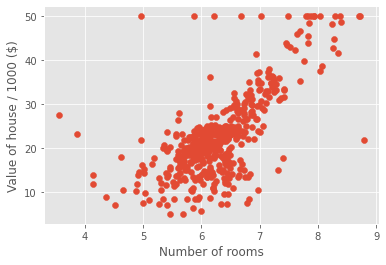

In [6]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

We can immediately see that more rooms lead to higher prices.

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

We want to check out the regressors predictions over the range of the data. We can achieve that by using np linspace between the maximum and minimum number of rooms and make a prediction for this data.

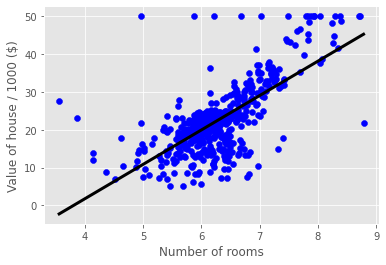

In [8]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

We want to fit a line to the data and a line in two dimensions is always of the form y = ax + b, where y is the target, x is the single feature, and a and b are the parameters of the model that we want to learn. So the question of fitting is reduced to: how do we choose a and b? A common method is to define an **error function** for any given line and then to choose the line that minimizes the error function. Such an error function is also called a loss or a cost function.

What will our loss function be? Intuitively, we want the line to be as close to the actual data points as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. This distance is called a residual. Now, we could try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason we minimize the sum of the squares of the residuals! This will be our loss function and using this loss function is commonly called ordinary least squares, or OLS for short. Note that this is the same as minimizing the mean squared error of the predictions on the training set. When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.

When we have two features and one target, a line is of the form y = a1x1 + a2x2 + b, so to fit a linear regression model is to specify three variables, a1, a2, and b. In higher dimensions, that is, when we have more than one or two features, a line of this form, so fitting a linear regression model is to specify a coefficient, ai, for each feature, as well as the variable, b. The scikit-learn API works exactly the same in this case: you pass the fit method two arrays: one containing the features, the other the target variable. Let's see this in action.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [12]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484937

In this code, we are working with all the features from the Boston Housing dataset. We split it into training and test sets; we instantiate the regressor, fit it on the training set and predict on the test set. We saw that, in the world of classification, we could use accuracy as a metric of model performance. The default scoring method for linear regression is called R squared. Intuitively, this metric quantifies the amount of variance in the target variable that is predicted from the feature variables. To compute the R squared, we once again apply the method score to the model and pass it two arguments: the test data and the test data target. Note that generally you will never use linear regression out of the box like this; you will most likely wish to use regularization. However, learning about linear regression and how to use it in scikit-learn is an essential first step toward using regularized linear models.

In [16]:
# Train/test split for regression
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7112260057484937
Root Mean Squared Error: 4.638689926172817


## Cross-validation and model performance

Well, let's think about it for a bit:

if you're computing R squared on your test set, the R squared returned is dependent on the way that you split up the data! The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.

- We begin by splitting the dataset into five groups or folds.
- Then we hold out the first fold as a test set,
- fit our model on the remaining four folds,
- predict on the test set, and compute the metric of interest.
- Next, we hold out the second fold as our test set,
- fit on the remaining data,
- predict on the test set, and compute the metric of interest.

Then similarly with the third, forth and fifth fold. As a result we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals.

As we split the dataset into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use k folds, it is called k-fold cross validation or k-fold CV. There is, however, a trade-off as using more folds is more computationally expensive. This is because you are fittings and predicting more times. This method avoids the problem of your metric of choice being dependent on the train test split.

To perform k-fold CV in scikit-learn, we first import cross val score from sklearn dot model selection. As always, we instantiate our model, in this case, a regressor. We then call cross val score with the regressor, the feature data, and the target data as the first three positional arguments. We also specify the number of folds with the keyword argument, cv. This returns an array of cross-validation scores, which we assign to cv results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression. . We print the scores here. We can also, for example, compute the mean, which we also do.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

print(cv_results)
print("Mean: " + str(np.mean(cv_results)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Mean: 0.3532759243958775


## Ridge regression

Recall that what fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. The first type of regularized regression that we'll look at is called ridge regression.

our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is. Note that alpha is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge regression is similar to picking k in KNN. This is called hyperparameter tuning and we'll see much more of this soon. This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity. Notice that when alpha is equal to zero, we get back OLS. Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. The method of performing ridge regression with scikit-learn mirrors the other models that we have seen.

We import Ridge from sklearn dot linear model, we split our data into test and train, fit on the training, and predict on the test. Note that we set alpha using the keyword argument alpha. Also notice the argument normalize: setting this equal to True ensures that all our variables are on the same scale.

In [20]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

## Lasso regression

There is another type of regularized regression called lasso regression, in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha. The method of performing lasso regression in scikit-learn mirrors ridge regression, as you can see here.

### Lasso regression for feature selection  
One of the really cool aspects of lasso regression is that it can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be exactly zero. The features whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm. Let's check this out in practice.

We import Lasso as before and store the feature names in the variable names. We then instantiate our regressor, fit it to the data as always. Then we can extract the coef attribute and store in lasso coef. Plotting the coefficients as a function of feature name yields this figure and you can see directly that the most important predictor for our target variable, housing price, is number of rooms! This is not surprising and is a great sanity check. This type of feature selection is very important for machine learning in an industry or business setting because it allows you, as a Data Scientist, to communicate important results to non-technical colleagues. And bosses! The power of reporting important features from a linear model cannot be overestimated. It is also valuable in research science, in order identify which factors are important predictors for various physical phenomena.

**Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.**

<function matplotlib.pyplot.show(close=None, block=None)>

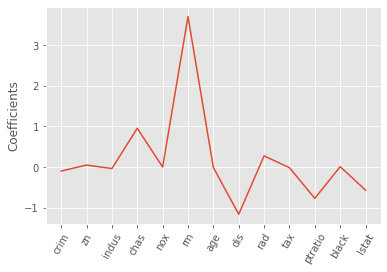

In [23]:
from sklearn.linear_model import Lasso
names = boston.drop('medv', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt. xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show

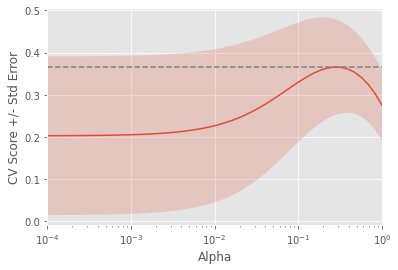

In [26]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)